In [30]:
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.colors as mplcolors, matplotlib.patheffects as pe
import numpy as np
from scipy import stats
from neurodyn import *
from matplotlib_tufte import *
setup()
import itertools

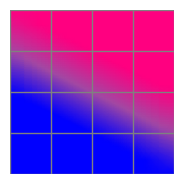

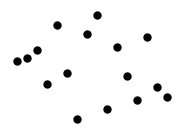

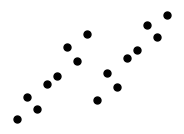

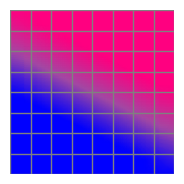

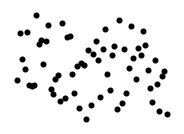

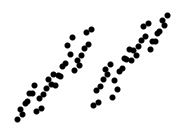

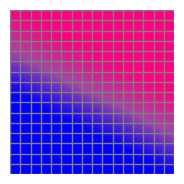

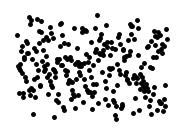

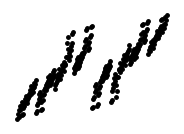

In [7]:
n = (1,2)
full_F = stats.norm.ppf(ColumnMapping.new_nrec(nrec=6).inverse_samples())
full_activity = fake_activity(full_F, n=n).reshape((2**6, 2**6))
X = full_F[:, 0].reshape((2**6, 2**6))
Y = full_F[:, 1].reshape((2**6, 2**6))

for nrec in [2,3,4]:
	fig, ax = plt.subplots(figsize=(2,2))
	ax.pcolormesh(X, Y, full_activity,
		cmap=cmap_bi, vmin=0, vmax=1, shading='gouraud', rasterized=True)
	for x in np.linspace(X.min(), X.max(), 2**nrec+1): ax.axvline(x, color='gray')
	for y in np.linspace(Y.min(), Y.max(), 2**nrec+1): ax.axhline(y, color='gray')
	ax.axis('off')
	mktrans(fig, ax)
	fig.savefig(f'tmpfigures/nrec={nrec}_grid.svg')

	for mapping_cls in [RandomMapping, ZMapping]:
		V = mapping_cls.new_nrec(nrec=nrec).inverse_samples(centered=True)
		F = stats.norm.ppf(V)
		a = fake_activity(F, n=n)
		fig, ax = plt.subplots(figsize=(2,1.5))
		ax.plot(a, 'o', markersize=1/nrec*10)
		ax.axis('off')
		mktrans(fig, ax)
		fig.savefig(f'tmpfigures/nrec={nrec}_{mapping_cls.__name__}.svg')

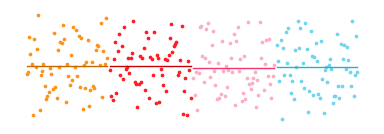

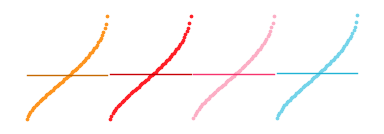

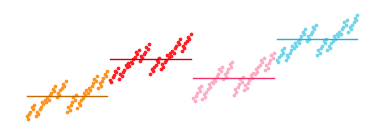

In [49]:
n = (1,2)
nrec = 6
nbins = 4
bin0 = 12

for mapping_cls in [RandomMapping, ColumnMapping, ZMapping]:
	V = mapping_cls.new_nrec(nrec=nrec).inverse_samples(centered=True)
	F = stats.norm.ppf(V)
	a = fake_activity(F, n=n)
	alpha = np.linspace(0, 1-1/4**nrec, 4**nrec)
	colors = itertools.cycle(['#750087','#001997','#06bd01','#ffff00','#fe941e','#ff1e26','#fcaec5','#74d4ea','#603814','#010101','#fbf7f4'])
	for _ in range(4): next(colors)
	fig, ax = plt.subplots(figsize=(4,1.5))
	for bini in range(nbins):
		mask = ((bin0+bini)*1/2**nrec < alpha) & (alpha < (bin0+bini+1)*1/2**nrec)
		c = next(colors)
		ax.plot(alpha[mask], a[mask], 'o', markersize=1/nrec*10, c=c)
		ax.plot(alpha[mask], np.full_like(alpha[mask], np.mean(a[mask])), color=scale_lightness(mplcolors.to_rgb(c), 0.7), linewidth=1)
	ax.axis('off')
	mktrans(fig, ax)
	fig.savefig(f'tmpfigures/variation_{mapping_cls.__name__}.svg')